# Создание нейронной сети

В этом задании мы создадим полносвязную нейронную сеть используя при этом низкоуровневые механизмы tensorflow.

Архитектутра нейросети представлена на следующем рисунке. Как видите, в ней имеется один входной слой, два скрытых, а так же выходной слой. В качестве активационной функции в скрытых слоях будет использоваться сигмоида. На выходном слое мы используем softmax.

Часть кода по созданию сети уже написана, от вас требуется заполнить пропуски в указанных местах.

## Архитектура нейронной сети

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## О датасете MNIST

Данную нейросеть мы будем обучать на датасете MNIST. Этот датасет представляет собой большое количество изображений рукописных цифр размером $28 \times 28$ пикселей. Каждый пиксель принимает значение от 0 до 255.

Как и раньше датасет будет разеделен на обучающую и тестовую выборки. При этом мы выполним нормализацию всех изображений, чтобы значения пикселей находились в промежутке от 0 до 1, разделив яркость каждого пикселя на 255.

Кроме того, архитектура нейронной сети ожидает на вход вектор. В нашем же случае каждый объект выборки представляет собой матрицу. Что же делать? В этом задании мы "растянем" матрицу $28 \times 28$, получив при этом вектор, состоящей из 784 элементов.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Больше информации о датасете можно найти [здесь](http://yann.lecun.com/exdb/mnist/).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
num_classes = 10  # общее количество классов, в нашем случае это цифры от 0 до 9
num_features = 784  # количество атрибутов входного вектора 28 * 28 = 784

learning_rate = 0.001  # скорость обучения нейронной сети
training_steps = 3000  # максимальное число эпох
batch_size = 256  # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов
# каждые 100 итераций мы будем показывать текущее значение функции потерь и точности
display_step = 100

n_hidden_1 = 128  # количество нейронов 1-го слоя
n_hidden_2 = 256  # количество нейронов 2-го слоя


In [3]:
from tensorflow.keras.datasets import mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape(
    [-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# метод repeat() без параметрів забезпечує нескінченну виборку
# Для тестування варто поставити певне число, припустимо, 10, наприкінці вийдемо через перевищення training_steps
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


In [4]:
# Поглянемо, що у нас є
# for i in range(5):
#     plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
#     plt.title(str(y_train[i]))
#     plt.show()

# import pandas as pd

# x_train_desc = pd.DataFrame(x_train).describe().T

# Дані нормалізовані, картинки продивляються, тож побережемо ресурси

# import random
# reIdx = random.sample(list(range(len(x_train))), len(x_train))
# y_shuffle = y_train[reIdx]
# y_test
#len(list(train_data))


In [5]:
# Создадим нейронную сеть

# Шар нейронної мережі
# В процесі ініціалізації створюємо екземпляр з вагами W та В, опціонально також передаємо метод активації
# "Виконання" шара - матричне множення вхідних іксів на ваги + В та застосування метода активації
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None, std_dev=0.05, activation="relu"):
        super().__init__(name=name)
        # Место для вашего кода
        # Прислухаємось до викладача, подалі зможемо використовувати стандартне відхилення як гіперпараметр
        self.w = tf.Variable(tf.random.normal(
            [in_features, out_features], stddev=std_dev), name="w")
        self.b = tf.Variable(tf.zeros([out_features]), name="b")
        self.activation = activation

    def __call__(self, x):
        # Место для вашего кода
        x = tf.matmul(x, self.w) + self.b

        if self.activation == 'relu':
            x = tf.nn.relu(x)
        elif self.activation == 'softmax':
            x = tf.nn.softmax(x)

        return x

# Клас нейромережі
# При ініціалізації визначаємо методи активації на трьох шарах
# Створюємо три шари

# Після виконання останнього використовуємо СофтМакс


class NN(tf.Module):
    def __init__(self, name=None, std_dev=0.05, activations=[]):
        super().__init__(name=name)
        # Первый слой, состоящий из 128 нейронов
        # Место для вашего кода
        # Трохи підготуємось
        # активації по замовчуванню, у нас 3 шари
        _activations = ["relu" for i in range(3)]
        for i in range(min(3, len(activations))):
            if activations[i] == "relu" or activations[i] == "softmax":
                _activations[i] = activations[i]
        self.Layer_1 = DenseLayer(
            in_features=784, out_features=128, std_dev=std_dev, activation=_activations[0])

        # Второй слой, состоящий из 256 нейронов
        # Место для вашего кода
        self.Layer_2 = DenseLayer(
            in_features=128, out_features=256, std_dev=std_dev, activation=_activations[1])

        # Выходной слой
        # Место для вашего кода
        self.Layer_3 = DenseLayer(
            in_features=256, out_features=10, std_dev=std_dev, activation=_activations[2])

    def __call__(self, x):
        # Место для вашего кода
        # ...

        # Помните что для выхода нейронной сети мы применяем к выходу функцию softmax.
        # Делаем мы это для того, чтобы
        # выход нейронной сети принимал значения от 0 до 1 в соответствии с вероятностью
        # принадлежности входного объекта к одному из 10 классов

        # x = # Место для вашего кода

        x = self.Layer_1(x)
        x = self.Layer_2(x)
        x = self.Layer_3(x)

        return tf.nn.softmax(x)


In [6]:
# В качестве функции ошибки в данном случае удобно взять кросс-энтропию
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Вычисление кросс-энтропии
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# В качестве метрики качества используем точность


def accuracy(y_pred, y_true):
    # Место для вашего кода
    # y_true - uint8, тож і argmax приведемо до цього типу
    # Гарна спроба, але ні - функція вимагає хоча б uint16
    y_pred_max = tf.argmax(y_pred, 1, tf.dtypes.int64)
    correct_pred = tf.equal(y_pred_max, tf.cast(y_true, tf.dtypes.int64))
    correct_pred = tf.cast(correct_pred, tf.dtypes.float32)

    return tf.reduce_mean(correct_pred, axis=-1)


In [7]:
# Создадим экзампляр нейронной сети
neural_net = NN(name="mnist")

# Функция обучения нейросети


def train(nn, input_x, output_y):
    # Для подгонки весов сети будем использовать стохастический градиентный спуск
    optimizer = tf.optimizers.SGD(learning_rate)

    # Активация автоматического дифференцирования
    with tf.GradientTape() as g:
        pred = neural_net(input_x)
        loss = cross_entropy(pred, output_y)

        # Создадим оптимизируемых список параметров
        # Место для вашего кода

        # nn.variables

        # Вычислим по ним значение градиента
        # Место для вашего кода
        gradients = g.gradient(loss, nn.variables)

        # Модифицируем параметры
        # Место для вашего кода
        optimizer.apply_gradients(zip(gradients, nn.variables))

    return pred


In [8]:
# Тренировка сети

# каждые display_step шагов сохраняйте в этом список текущую ошибку нейросети
loss_history = []
# каждые display_step шагов сохраняйте в этом список текущую точность нейросети
accuracy_history = []

'''
Запропонована структура домашньої роботи передбачає збір статистики по втратам і точності кожні 100 кроків навчання
З огляду на те, що тестові дані були виділені на початку, не оформлені у вигляді датасетів тензора, передбачається що і точність визначатиметься на тренувальних даних.
Але такий підхід може привести до перенавчання моделі, тож ризикну точніть визначати не по тренувальним даним, а по тестовим
'''
# test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

test_accuracy_history = []


# В этом цикле мы будем производить обучение нейронной сети
# из тренировочного датасета train_data извлеките случайное подмножество, на котором
# произведется тренировка. Используйте метод take, доступный для тренировочного датасета.
for step, (batch_x, batch_y) in enumerate(train_data): # Место для вашего кода:
    # Обновляем веса нейронной сети
    # Место для вашего кода
    pred_y = train(neural_net, batch_x, batch_y)
    curr_loss = cross_entropy(pred_y, batch_y)
    curr_accu = accuracy(pred_y, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        print(f"Step {step}: {curr_loss}; accuracy: {curr_accu}")
        loss_history.append(curr_loss)
        accuracy_history.append(curr_accu)
        pred_test = neural_net(x_test)
        curr_accu_test = accuracy(pred_test, y_test)
        test_accuracy_history.append(curr_accu_test)
        print(curr_accu_test)

        if step > training_steps:
            break

    # Место для вашего кода


Step 0: 590.0542602539062; accuracy: 0.0703125
tf.Tensor(0.1467, shape=(), dtype=float32)
Step 100: 165.20924377441406; accuracy: 0.796875
tf.Tensor(0.7925, shape=(), dtype=float32)
Step 200: 140.2609405517578; accuracy: 0.796875
tf.Tensor(0.8278, shape=(), dtype=float32)
Step 300: 122.12789916992188; accuracy: 0.859375
tf.Tensor(0.8487, shape=(), dtype=float32)
Step 400: 119.40097045898438; accuracy: 0.8359375
tf.Tensor(0.8537, shape=(), dtype=float32)
Step 500: 101.20948791503906; accuracy: 0.83203125
tf.Tensor(0.8625, shape=(), dtype=float32)
Step 600: 88.56394958496094; accuracy: 0.87890625
tf.Tensor(0.8661, shape=(), dtype=float32)
Step 700: 101.94703674316406; accuracy: 0.84765625
tf.Tensor(0.8689, shape=(), dtype=float32)
Step 800: 93.88182067871094; accuracy: 0.8671875
tf.Tensor(0.8691, shape=(), dtype=float32)
Step 900: 103.59709930419922; accuracy: 0.84765625
tf.Tensor(0.8746, shape=(), dtype=float32)
Step 1000: 114.42637634277344; accuracy: 0.83203125
tf.Tensor(0.8721, shape

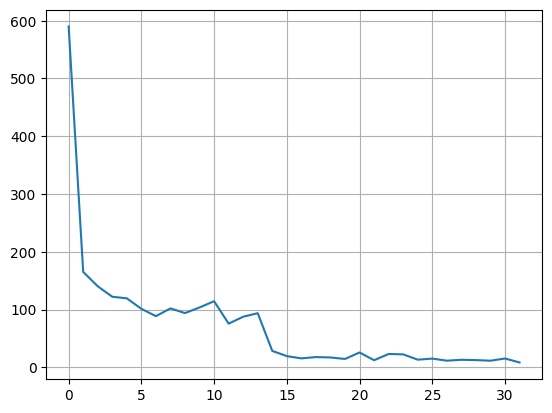

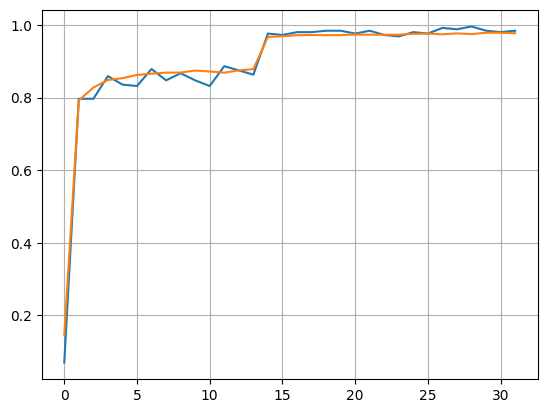

'\n'

In [9]:
# Выведите графики зависимости изменения точности и потерь от шага
# Если все сделано правильно, то точность должна расти, а потери уменьшаться

# Место для вашего кода
plt.plot(loss_history)
plt.grid()
plt.show()

plt.plot(accuracy_history)
plt.plot(test_accuracy_history)
plt.grid()
plt.show()

"""
Відповідно до структури домашнього завдання навчання відбувалося не епохами, а нескінченним конвеєром з воходом через N циклів.
Статистика по втратам і точності знімалась кожні 100 кроків навчання, отже графік має певні коливання, які були б згладжені,
якби ми знімали статистику кожної епохи або використали ковзне (рухоме) середнє.
В будь якому разі показники втрат і точності вийшли на плато, і дана модель досягла межі навчання. Для покращення результатів
треба змінювати гіперпараметри або бавитись із вхідним шафлом (зауважу, що в ході експериментів і перезапуску моделі досягалися результати точності
для тестових даних, наближені до 1, при цьому змінювалось тільки перемішування тренувальних даних)
"""

"""
"""


In [10]:
# Вычислите точность обученной нейросети

# Место для вашего кода
"""
Я дещо відійшов від структури завдання і розраховував точність мережі на тестових даних кожні 100 кроків,
тож можемо використати останнє значення точності з історії замірів
"""

nn_acc = test_accuracy_history[len(test_accuracy_history) - 1]
nn_acc

<tf.Tensor: shape=(), dtype=float32, numpy=0.9774>

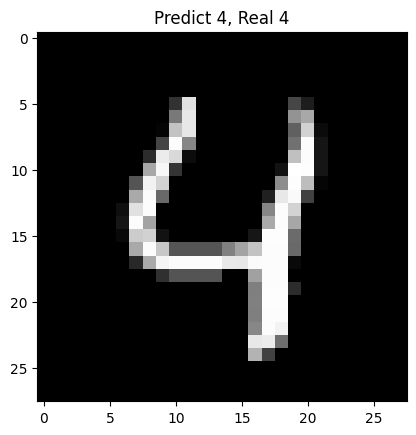

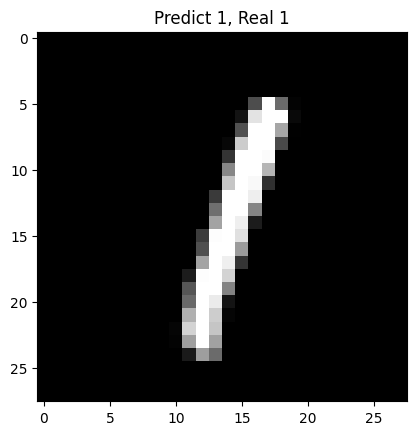

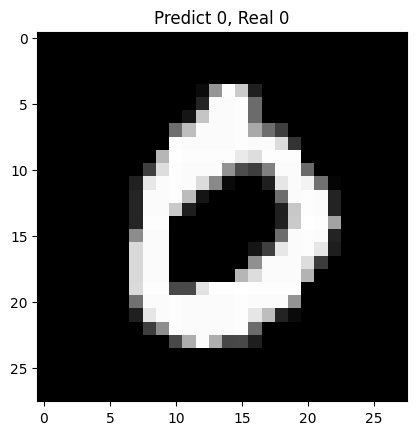

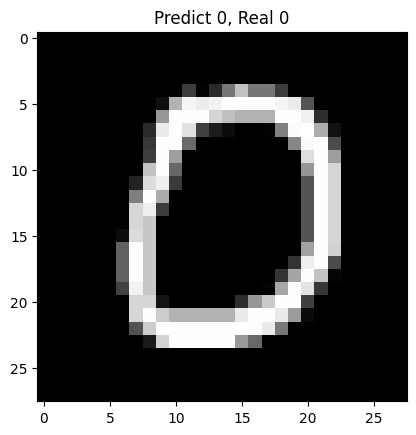

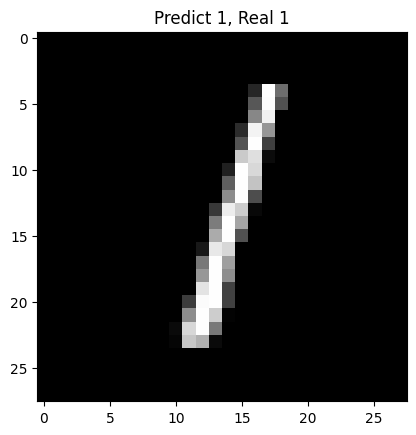

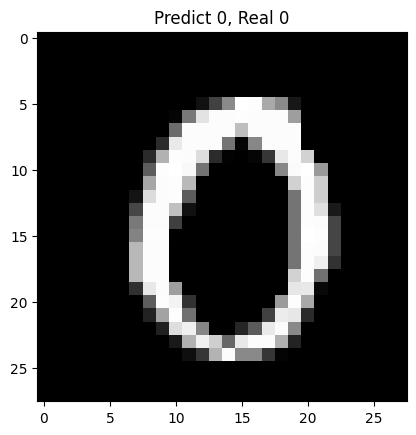

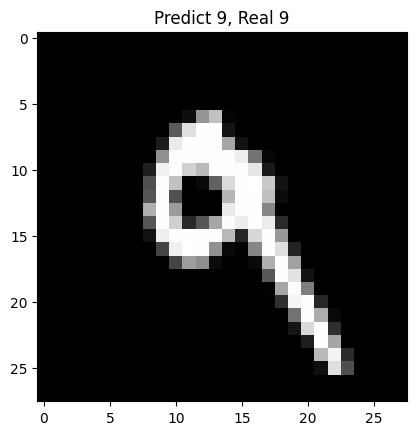

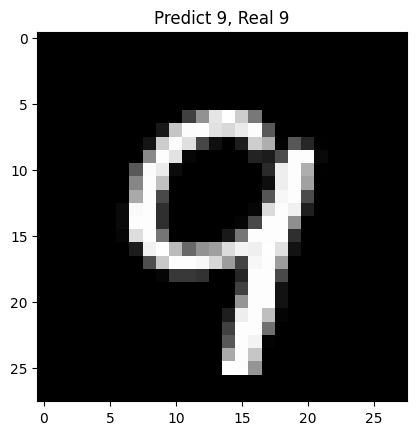

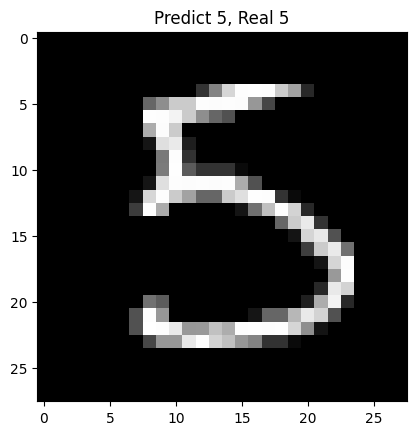

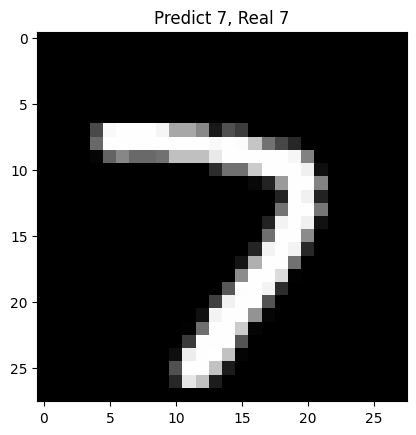

In [21]:
# Протестируем обученную нейросеть на 10 изображениях. Из тестовой выборки возьмите 5
# случайных изображений и передайте их в нейронню сеть.
# Выведите изображение и выпишите рядом ответ нейросети.
# Сделайте вывод о том ошибается ли ваша нейронная сеть и если да, то как часто?

# Место для вашего кода

final_test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
final_test_data = final_test_data.repeat(1).shuffle(10).take(10)

for final_x, final_y in final_test_data:
    #print(final_x)
    #print(final_y)
    #print(final_x.numpy().reshape(1, 28*28))
    plt.imshow(final_x.numpy().reshape(28, 28), cmap="gray")
    pred = neural_net(final_x.numpy().reshape(1, 28*28))
    pred_value = pred.numpy().argmax(axis=1)[0]
    real_value = final_y.numpy()
    plt.title(f"Predict {pred_value}, Real {real_value}")
    plt.show()
    #plt.title(f"Predict: {test_out.numpy().argmax(axis=1)[i - 1]} Real: {df.iloc[i-1, 0]}")


""" 
Наразі після багатьох спроб вдалося натренувати модель до рівня близького до 1, що підтверджено тестуванням.
Однак цей результат не є стбільним і перезапуск та навчання моделі дають результати від 0.8 до майже 1.
Єдиний параметр, що змінювався і не контролювався - перемішування перед навчанням. Скорше за все більш стабільний результат
можна отримати, погравшись з репрезентативністю пакетів: я б поставив на те, що модель буде краще навчатись,
якщо в кожному пакеті приблизно в однаковій мірі будуть представлені всі цифри
"""

""" 
"""
# smth = list(neural_net.variables)
# for i, var_val in enumerate(smth):
#     np.save(f"var{i}.csv", var_val)
# #v0.numpy()